Text(0, 0.5, 'Prix en $/Mbyte')

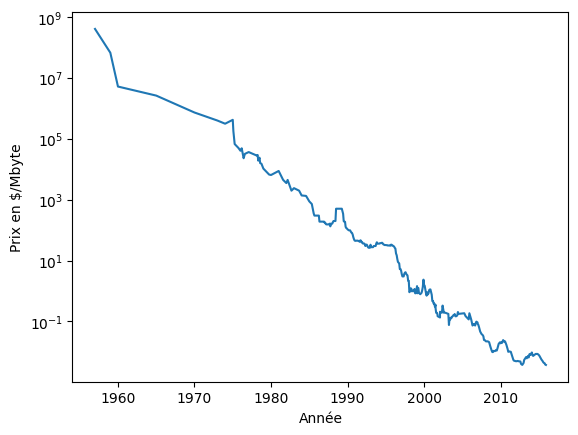

In [3]:
%matplotlib inline

# Le domaine de définition du modèle de prédiction pour un régression
# basée sur un arbre de décision se limite au domaine d'entrainnement
# x < a => y , quelque soit x1<x2<...<x

import os
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Année')
plt.ylabel('Prix en $/Mbyte')

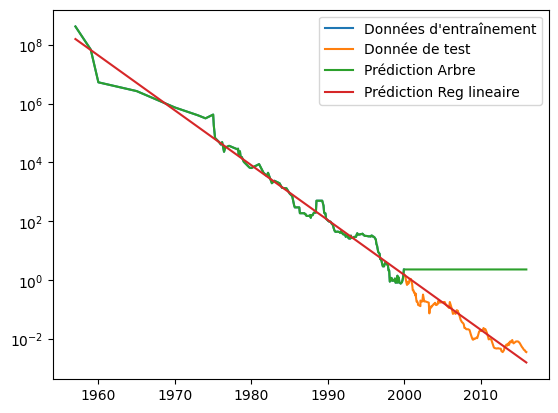

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np;

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = np.asarray(data_train.date)[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

X_all = np.asarray(ram_prices.date)[:,np.newaxis]

prediction_tree = tree.predict(X_all)
prediction_linearR = linear_reg.predict(X_all)

price_tree = np.exp(prediction_tree)
price_linearR = np.exp(prediction_linearR)

plt.semilogy(data_train.date, data_train.price, label="Données d'entraînement")
plt.semilogy(data_test.date, data_test.price, label="Donnée de test")
plt.semilogy(ram_prices.date, price_tree, label="Prédiction Arbre")
plt.semilogy(ram_prices.date, price_linearR, label="Prédiction Reg lineaire")
plt.legend()